In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline
import seaborn as sns
sns.set_palette('coolwarm')
import time
import os

#import xgboost as xgb
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.utils import check_array
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
1+1+1

3

In [4]:
# load train and test data
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

(train.shape, test.shape)
# encode categorical data
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

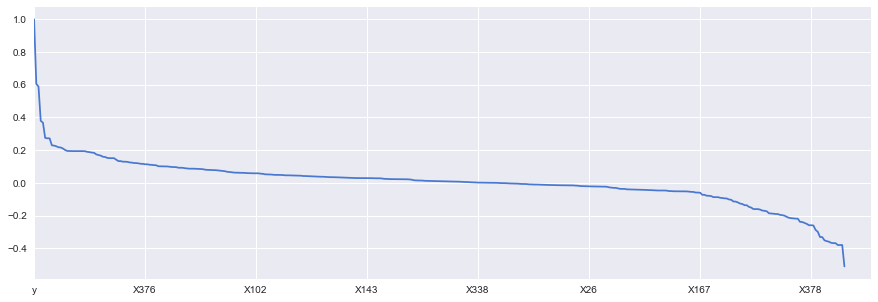

In [19]:
corrmat = train.corr()
plt.figure(figsize=(15,5))
corrmat['y'].sort_values(ascending=False).plot()

In [20]:
# get X and y for training
X_train = train.drop('y', axis=1)
y_train = train['y']

# get X for testing
X_test = test
X_train.shape, y_train.shape, X_test.shape

((4209, 377), (4209,), (4209, 377))

In [28]:
sp = SelectPercentile(score_func=f_regression)
feats = sp.fit_transform(X_train, y_train)

In [33]:
feats

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ..., 
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [5]:
n_comp = 2

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train.drop(['ID', 'y'], axis=1))

In [39]:
# Create a colormap
colormap = np.array(['red', 'lime', 'black','yellow'])
plt.scatter(pca2_results_train[:,0],pca2_results_train[:,1], c=colormap[clusters.labels_])

In [47]:
pca2_results_train.shape

(4209, 2)

In [9]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(train[['X0','y','X1','X2']])

(array([  665.,     0.,     0.,  1477.,     0.,     0.,  1202.,     0.,
            0.,   865.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

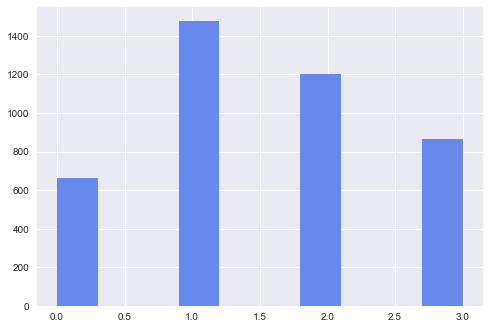

In [38]:
plt.hist(clusters.labels_)

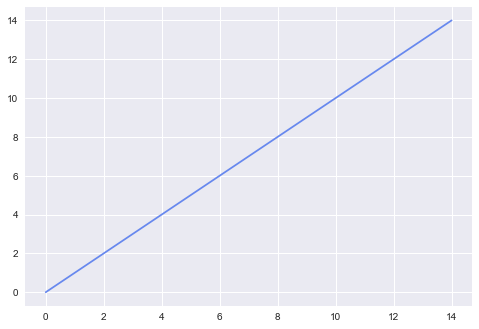

In [18]:
plt.plot(np.arange(15))